# ITS307 Data Analytics                                                   : Spring Semester 2022
# Lecture 19- Exercise
# Unsupervised Learning : DBSCAN Clustering

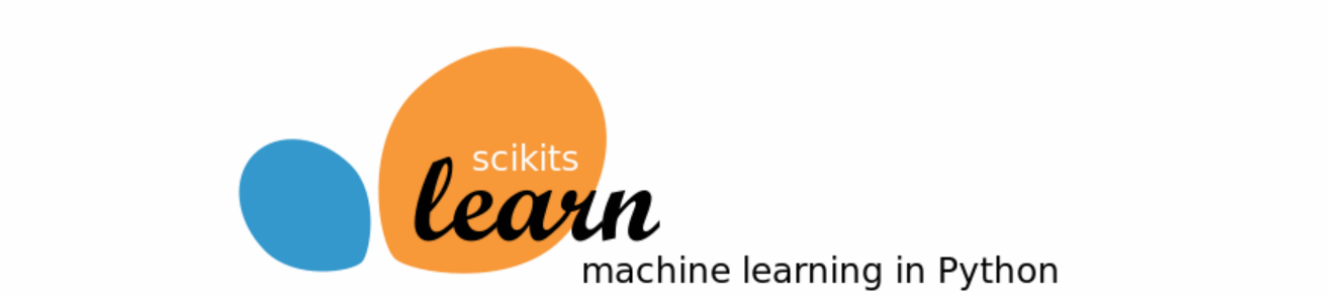

# What is DBSCAN?

- Another very useful clustering algorithm is DBSCAN (which stands for “**densitybased
spatial clustering of applications with noise**”). The main benefits of DBSCAN
are that it does not require the user to set the number of clusters a priori, it can capture
clusters of complex shapes, and it can identify points that are not part of any
cluster. DBSCAN is somewhat slower than k-means, but
still scales to relatively large datasets.


- DBSCAN works by identifying points that are in “crowded” regions of the feature
space, where many data points are close together. These regions are referred to as
dense regions in feature space. The idea behind DBSCAN is that clusters form dense
regions of data, separated by regions that are relatively empty.


- Points that are within a dense region are called core samples (or core points), and they
are defined as follows. There are two parameters in DBSCAN: `min_samples` and `eps`.
If there are at least min_samples many data points within a distance of eps to a given
data point, that data point is classified as a core sample. Core samples that are closer
to each other than the distance eps are put into the same cluster by DBSCAN.


# Explain working of DBSCAN

The algorithm works by picking an arbitrary point to start with. It then finds all
points with distance `eps` or less from that point. If there are less than `min_samples`
points within distance `eps` of the starting point, this point is labeled as noise, meaning
that it doesn’t belong to any cluster. If there are more than `min_samples` points within
a distance of `eps`, the point is labeled a core sample and assigned a new cluster label.
Then, all neighbors (within `eps`) of the point are visited. If they have not been
assigned a cluster yet, they are assigned the new cluster label that was just created. If
they are core samples, their neighbors are visited in turn, and so on. The cluster
grows until there are no more core samples within distance `eps` of the cluster. Then
another point that hasn’t yet been visited is picked, and the same procedure is
repeated.

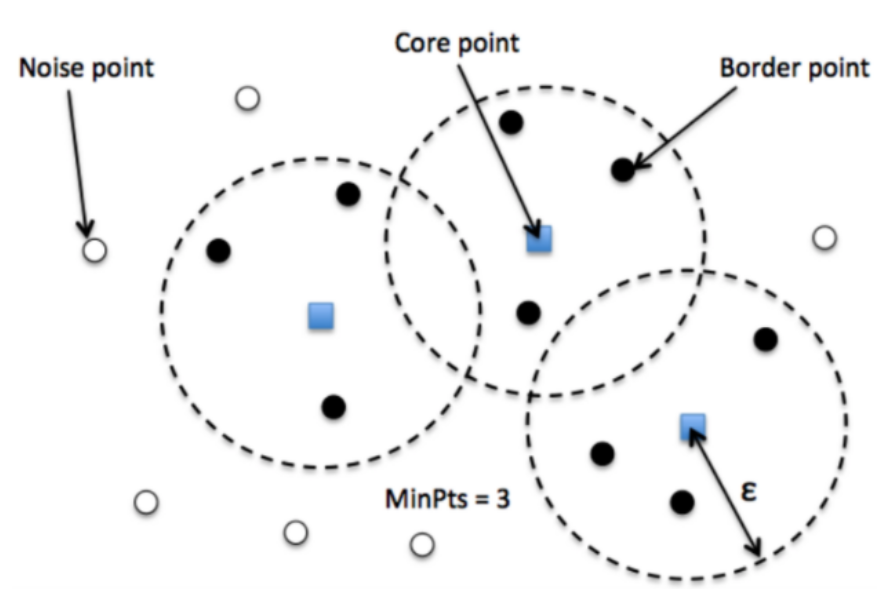

In the end, there are three kinds of points: **core points**, points that are within distance
eps of core points (called **boundary points**), and **noise**. When the DBSCAN algorithm
is run on a particular dataset multiple times, the clustering of the core points is always
the same, and the same points will always be labeled as noise. However, a boundary
point might be neighbor to core samples of more than one cluster. Therefore, the
cluster membership of boundary points depends on the order in which points are visited.
Usually there are only few boundary points, and this slight dependence on the
order of points is not important.

# Differentiate DBSCAN from KMean using any iris dataset

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# 1. Data Manipulation with pandas

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)
df.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

# 2. EDA

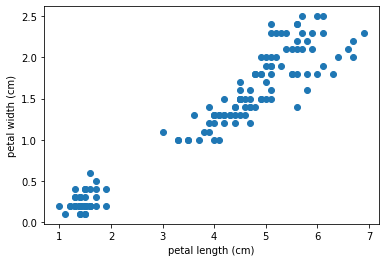

In [5]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

# 3. Training Model

## 3.1. KMean Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmean = KMeans(n_clusters=2)
kmean.fit(df)

KMeans(n_clusters=2)

In [8]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
kmean.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [10]:
kmean.inertia_

86.39021984551391

In [11]:
x_sample = [[1.4,5.3],[1.3,0.3]]
kmean.predict(x_sample)

array([0, 0])

## 3.2. DBSCAN Clustering

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=10)
dbscan.fit(df)

DBSCAN(eps=1, min_samples=10)

In [13]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# 4. Visual Representation of Clusters

In [14]:
df['km'] = kmean.labels_
df.head()

petal length (cm)  petal width (cm)  km
0                1.4               0.2   0
1                1.4               0.2   0
2                1.3               0.2   0
3                1.5               0.2   0
4                1.4               0.2   0

In [15]:
df['dbscan'] = dbscan.labels_
df.head()

petal length (cm)  petal width (cm)  km  dbscan
0                1.4               0.2   0       0
1                1.4               0.2   0       0
2                1.3               0.2   0       0
3                1.5               0.2   0       0
4                1.4               0.2   0       0

In [16]:
km0 = df[df.km == 0]
km0

petal length (cm)  petal width (cm)  km  dbscan
0                 1.4               0.2   0       0
1                 1.4               0.2   0       0
2                 1.3               0.2   0       0
3                 1.5               0.2   0       0
4                 1.4               0.2   0       0
5                 1.7               0.4   0       0
6                 1.4               0.3   0       0
7                 1.5               0.2   0       0
8                 1.4               0.2   0       0
9                 1.5               0.1   0       0
10                1.5               0.2   0       0
11                1.6               0.2   0       0
12                1.4               0.1   0       0
13                1.1               0.1   0       0
14                1.2               0.2   0       0
15                1.5               0.4   0       0
16                1.3               0.4   0       0
17                1.4               0.3   0       0
18                1.7               0.3   0       0
19                1.5               0.3   0       0
20                1.7               0.2   0       0
21                1.5               0.4   0       0
22                1.0               0.2   0       0
23                1.7               0.5   0       0
24                1.9               0.2   0       0
25                1.6               0.2   0       0
26                1.6               0.4   0       0
27                1.5               0.2   0       0
28                1.4               0.2   0       0
29                1.6               0.2   0       0
30                1.6               0.2   0       0
31                1.5               0.4   0       0
32                1.5               0.1   0       0
33                1.4               0.2   0       0
34                1.5               0.2   0       0
35                1.2               0.2   0       0
36                1.3               0.2   0       0
37                1.4               0.1   0       0
38                1.3               0.2   0       0
39                1.5               0.2   0       0
40                1.3               0.3   0       0
41                1.3               0.3   0       0
42                1.3               0.2   0       0
43                1.6               0.6   0       0
44                1.9               0.4   0       0
45                1.4               0.3   0       0
46                1.6               0.2   0       0
47                1.4               0.2   0       0
48                1.5               0.2   0       0
49                1.4               0.2   0       0
98                3.0               1.1   0       1

In [17]:
km1 = df[df.km == 1]
km1

petal length (cm)  petal width (cm)  km  dbscan
50                 4.7               1.4   1       1
51                 4.5               1.5   1       1
52                 4.9               1.5   1       1
53                 4.0               1.3   1       1
54                 4.6               1.5   1       1
..                 ...               ...  ..     ...
145                5.2               2.3   1       1
146                5.0               1.9   1       1
147                5.2               2.0   1       1
148                5.4               2.3   1       1
149                5.1               1.8   1       1

[99 rows x 4 columns]

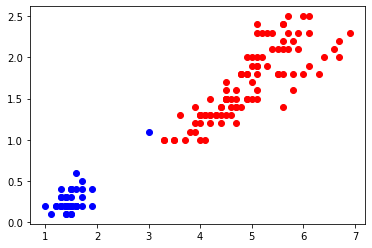

In [18]:
plt.scatter(km0['petal length (cm)'],km0['petal width (cm)'],color='blue')
plt.scatter(km1['petal length (cm)'],km1['petal width (cm)'],color='red')

In [19]:
db0 = df[df.dbscan == 0]
db0

petal length (cm)  petal width (cm)  km  dbscan
0                 1.4               0.2   0       0
1                 1.4               0.2   0       0
2                 1.3               0.2   0       0
3                 1.5               0.2   0       0
4                 1.4               0.2   0       0
5                 1.7               0.4   0       0
6                 1.4               0.3   0       0
7                 1.5               0.2   0       0
8                 1.4               0.2   0       0
9                 1.5               0.1   0       0
10                1.5               0.2   0       0
11                1.6               0.2   0       0
12                1.4               0.1   0       0
13                1.1               0.1   0       0
14                1.2               0.2   0       0
15                1.5               0.4   0       0
16                1.3               0.4   0       0
17                1.4               0.3   0       0
18                1.7               0.3   0       0
19                1.5               0.3   0       0
20                1.7               0.2   0       0
21                1.5               0.4   0       0
22                1.0               0.2   0       0
23                1.7               0.5   0       0
24                1.9               0.2   0       0
25                1.6               0.2   0       0
26                1.6               0.4   0       0
27                1.5               0.2   0       0
28                1.4               0.2   0       0
29                1.6               0.2   0       0
30                1.6               0.2   0       0
31                1.5               0.4   0       0
32                1.5               0.1   0       0
33                1.4               0.2   0       0
34                1.5               0.2   0       0
35                1.2               0.2   0       0
36                1.3               0.2   0       0
37                1.4               0.1   0       0
38                1.3               0.2   0       0
39                1.5               0.2   0       0
40                1.3               0.3   0       0
41                1.3               0.3   0       0
42                1.3               0.2   0       0
43                1.6               0.6   0       0
44                1.9               0.4   0       0
45                1.4               0.3   0       0
46                1.6               0.2   0       0
47                1.4               0.2   0       0
48                1.5               0.2   0       0
49                1.4               0.2   0       0

In [20]:
db1 = df[df.dbscan == 1]
db1

petal length (cm)  petal width (cm)  km  dbscan
50                 4.7               1.4   1       1
51                 4.5               1.5   1       1
52                 4.9               1.5   1       1
53                 4.0               1.3   1       1
54                 4.6               1.5   1       1
..                 ...               ...  ..     ...
145                5.2               2.3   1       1
146                5.0               1.9   1       1
147                5.2               2.0   1       1
148                5.4               2.3   1       1
149                5.1               1.8   1       1

[100 rows x 4 columns]

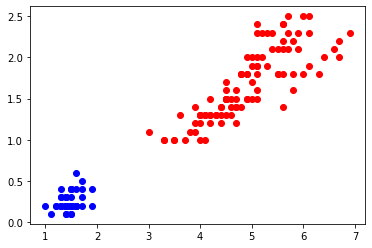

In [21]:
plt.scatter(db0['petal length (cm)'],db0['petal width (cm)'],color='blue')
plt.scatter(db1['petal length (cm)'],db1['petal width (cm)'],color='red')

# 5. Generating random datasets to apply DBSCAN Clustering

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)

In [23]:
X

array([[ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [-4.07989383,  3.57150086],
       [ 3.54934659,  0.6925054 ],
       [ 2.49913075,  1.23133799],
       [ 1.9263585 ,  4.15243012]])

In [24]:
xdf = pd.DataFrame(X,columns=['x','y'])
xdf

x         y
0  1.120314  5.758061
1  1.737308  4.425462
2  2.368335  0.043568
3  0.873051  4.714386
4 -0.662468  2.175717
5  0.742851  1.463517
6 -4.079894  3.571501
7  3.549347  0.692505
8  2.499131  1.231338
9  1.926358  4.152430

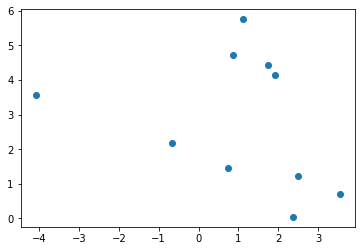

In [25]:
plt.scatter(xdf['x'],xdf['y'])

In [26]:
db = DBSCAN(eps=2,min_samples=2)
db.fit(xdf)
db.labels_

array([ 0,  0,  1,  0,  1,  1, -1,  1,  1,  0], dtype=int64)

In [27]:
xdf['cluster'] =db.labels_

In [28]:
xdf

x         y  cluster
0  1.120314  5.758061        0
1  1.737308  4.425462        0
2  2.368335  0.043568        1
3  0.873051  4.714386        0
4 -0.662468  2.175717        1
5  0.742851  1.463517        1
6 -4.079894  3.571501       -1
7  3.549347  0.692505        1
8  2.499131  1.231338        1
9  1.926358  4.152430        0

In [29]:
cl0 = xdf[xdf.cluster == 0]
cl0

x         y  cluster
0  1.120314  5.758061        0
1  1.737308  4.425462        0
3  0.873051  4.714386        0
9  1.926358  4.152430        0

In [30]:
cl1 = xdf[xdf.cluster == 1]
cl1

x         y  cluster
2  2.368335  0.043568        1
4 -0.662468  2.175717        1
5  0.742851  1.463517        1
7  3.549347  0.692505        1
8  2.499131  1.231338        1

In [31]:
cln = xdf[xdf.cluster == -1]
cln

x         y  cluster
6 -4.079894  3.571501       -1

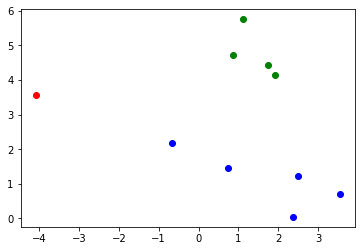

In [32]:
plt.scatter(cl0.x,cl0.y,color='green')
plt.scatter(cl1.x,cl1.y,color='blue')
plt.scatter(cln.x,cln.y,color='red')

# 6. Generating dataset using make_moons() function

`sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)`

In [33]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100,noise=0.05,random_state=5)

In [34]:
moondf = pd.DataFrame(data=X,columns=['x','y'])
moondf.head()

x         y
0  0.495076 -0.347694
1 -0.499036  0.975313
2 -1.052842  0.207753
3 -0.208385  0.960491
4  0.988683 -0.449691

In [35]:
plt.scatter(moondf.x,moondf.y)

In [36]:
kmoon = KMeans(n_clusters = 2)
kmoon.fit(moondf)
kmoon.labels_

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [37]:
moondf['cluster'] = kmoon.labels_

In [38]:
moon0 = moondf[moondf.cluster == 0]

In [39]:
moon1 = moondf[moondf.cluster == 1]

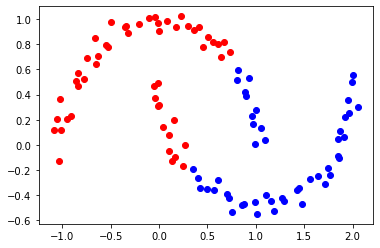

In [40]:
plt.scatter(moon1.x,moon1.y,color='blue')
plt.scatter(moon0.x,moon0.y,color='red')

In [41]:
dbmoon = DBSCAN(eps=0.4,min_samples=5)
dbmoon.fit(moondf.drop('cluster',axis=1))
dbmoon.labels_

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
moondf['db'] = dbmoon.labels_

In [43]:
dbmoon0 = moondf[moondf.db == 0]
dbmoon1 = moondf[moondf.db == 1]

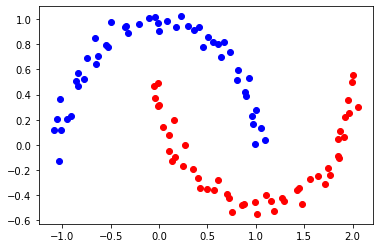

In [44]:
plt.scatter(dbmoon0.x,dbmoon0.y,color='red')
plt.scatter(dbmoon1.x,dbmoon1.y,color='blue')

In [45]:
moondf.head()

x         y  cluster  db
0  0.495076 -0.347694        1   0
1 -0.499036  0.975313        0   1
2 -1.052842  0.207753        0   1
3 -0.208385  0.960491        0   1
4  0.988683 -0.449691        1   0

# 7. Evaluating Clustering algorithm

### Why not classification evaluation metrics?

Every classification evaluation metric either it is a confusion matrix or log loss there is a need for a dependent variable or target variable. As these evaluation techniques calculate the metrics based on observed and predicted values. This is the reason why any classification evaluation metrics can not be used to evaluate the performance of any clustering algorithms. 

The evaluation metrics which do not require any ground truth labels to calculate the efficiency of the clustering algorithm could be used for the computation of the performance evaluation.

### Silhouette Score

The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.

Note that Silhouette Coefficient is only defined if number of labels is `2 <= n_labels <= n_samples - 1.` This function returns the mean Silhouette Coefficient over all samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster.

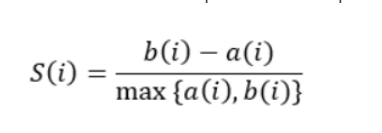

- S(i) is the silhouette coefficient of the data point i.

- a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
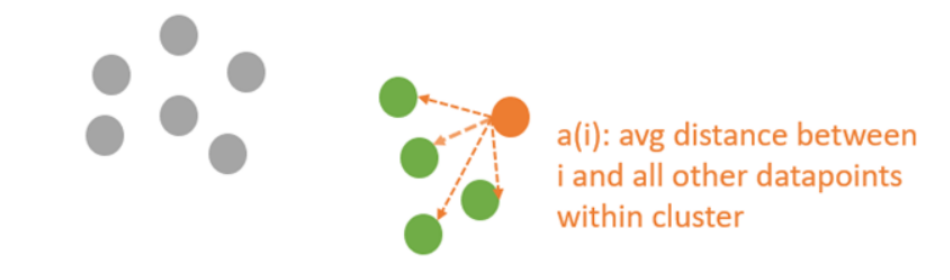

- b(i) is the average distance from i to all clusters to which i does not belong.
 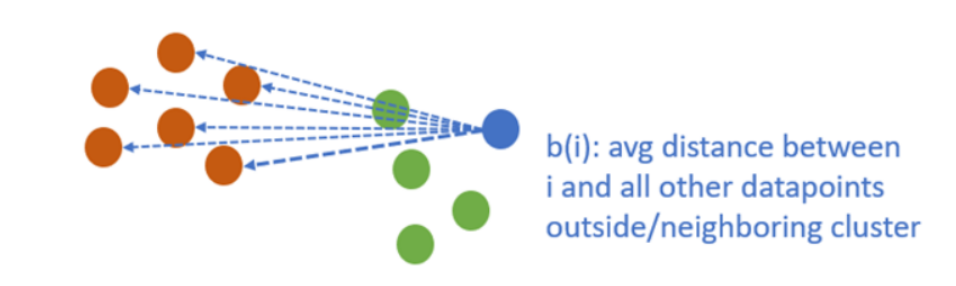

`sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds`

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
sil_coeff = silhouette_score(X, dbmoon.labels_, metric='euclidean')
sil_coeff

0.30788711869171803

In [50]:
df.head()

petal length (cm)  petal width (cm)  km  dbscan
0                1.4               0.2   0       0
1                1.4               0.2   0       0
2                1.3               0.2   0       0
3                1.5               0.2   0       0
4                1.4               0.2   0       0

In [54]:
df = df.drop(['km','dbscan'],axis=1)

In [61]:
K = np.arange(2,10)
sil_score = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sil_score.append(silhouette_score(df,km.labels_))

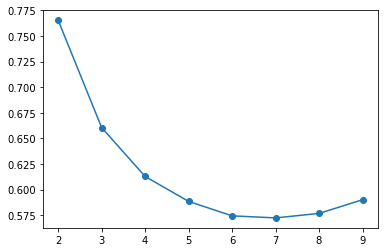

In [62]:
plt.plot(K,sil_score,'-o')

In [63]:
sil_score

[0.7653904101258123,
 0.6604800083974887,
 0.6127580794464402,
 0.5883732712110276,
 0.5742781004247128,
 0.572249622276488,
 0.5766617476368243,
 0.5900193513265346]